In [1]:
!pip install imbalanced-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve,roc_curve,roc_auc_score,accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from collections import Counter

In [3]:
data = pd.read_csv("/content/creditcard.csv")

In [4]:
data.head()
data.dtypes
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
v_data = data.loc[:, 'V1':'V28'].describe()
v_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


In [6]:
min_value = data.loc[:, 'V1':'V28'].min().min()
max_value = data.loc[:, 'V1':'V28'].max().max()
print(f"Minimum Value: {min_value}")
print(f"Maximum Value: {max_value}")

Minimum Value: -113.743306711146
Maximum Value: 120.589493945238


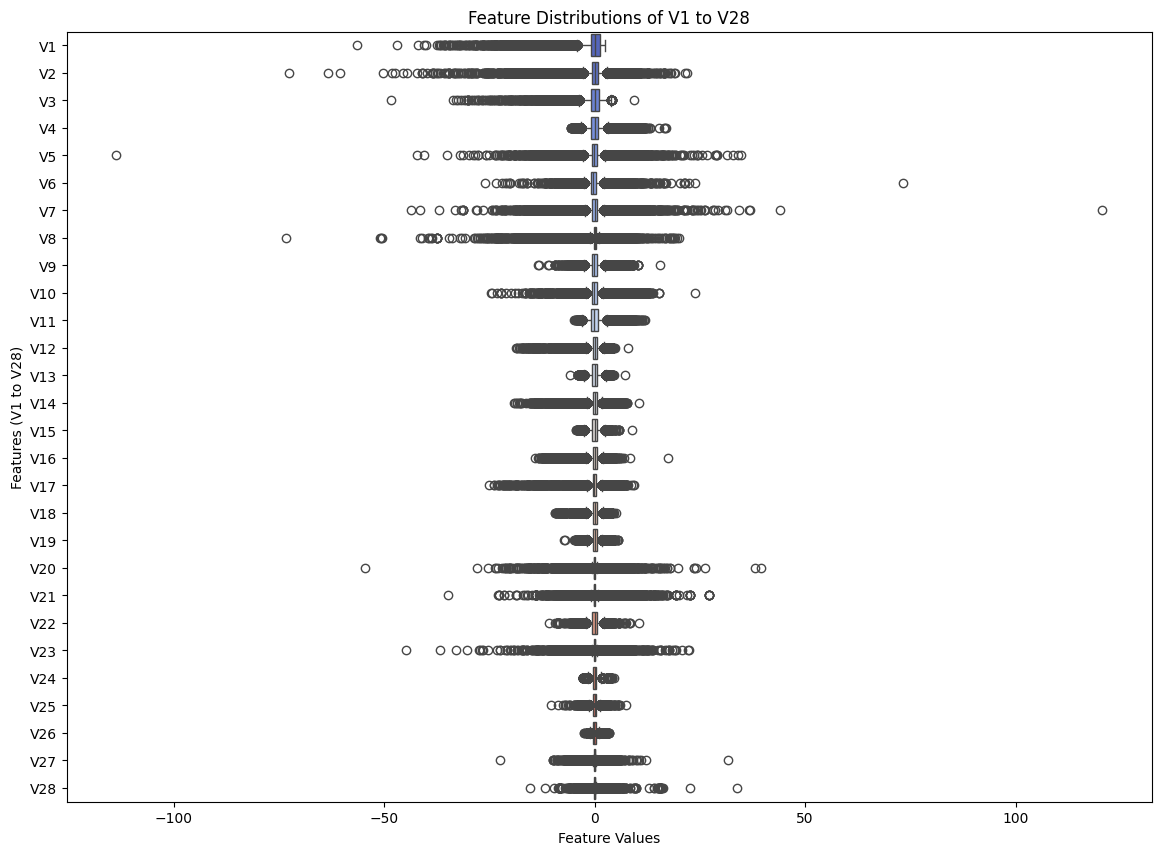

In [7]:
plt.figure(figsize=(14, 10))
sns.boxplot(data=data.iloc[:, 1:29], orient="h", palette="coolwarm")
plt.xlabel("Feature Values")
plt.ylabel("Features (V1 to V28)")
plt.title("Feature Distributions of V1 to V28")
plt.show()

In [8]:
class_data=data['Class'].describe()
class_data

,Class
count,284807.000000
mean,0.001727
std,0.041527
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
value_counts = data['Class'].value_counts()
value_counts

,count
Class,
0,284315
1,492


In [10]:
data.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [11]:
from sklearn.preprocessing import StandardScaler # Import the StandardScaler class from sklearn.preprocessing

scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

In [12]:
scaler = StandardScaler()
data['Amount_Scaled'] = scaler.fit_transform(data[['Amount']])
data.drop(['Time', 'Amount'], axis=1, inplace=True)

In [13]:
X = data.drop('Class', axis=1)
y = data['Class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

**Balancing test and train datasets using SMOTE**

In [15]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

In [16]:
print(pd.Series(y_train_resampled).value_counts())
print(pd.Series(y_test_resampled).value_counts())

Class
0    199020
1    199020
Name: count, dtype: int64
Class
0    85295
1    85295
Name: count, dtype: int64


In [17]:
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 199020, 1: 344})
After SMOTE: Counter({0: 199020, 1: 199020})


In [18]:
print("Before SMOTE:", Counter(y_test))
print("After SMOTE:", Counter(y_test_resampled))

Before SMOTE: Counter({0: 85295, 1: 148})
After SMOTE: Counter({0: 85295, 1: 85295})


**Comparison of Data distribution**

<ipython-input-19-7e4b0af9f566>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='coolwarm')
<ipython-input-19-7e4b0af9f566>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette='coolwarm')


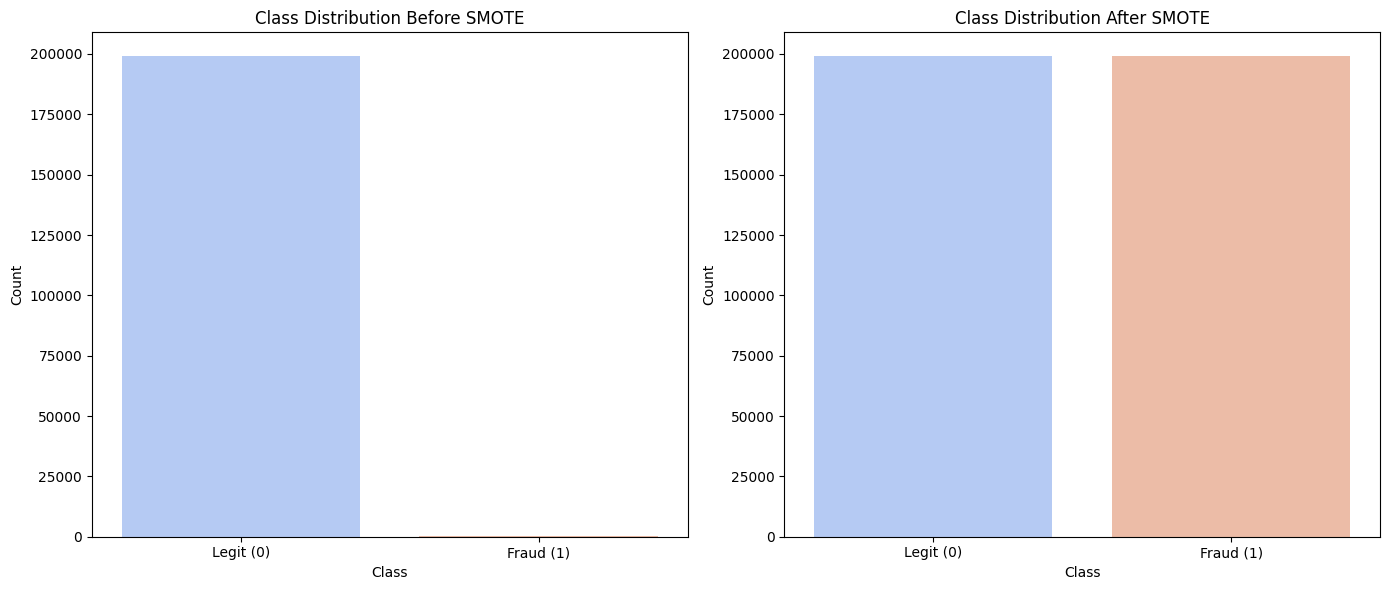

In [19]:
plt.figure(figsize=(14, 6))
#Before SMOTE
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='coolwarm')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legit (0)', 'Fraud (1)'])

# After SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled, palette='coolwarm')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legit (0)', 'Fraud (1)'])

plt.tight_layout()
plt.show()

**Training model using Random Forest [balanced data]**

In [20]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [21]:
y_pred_balanced= model.predict(X_test_resampled)

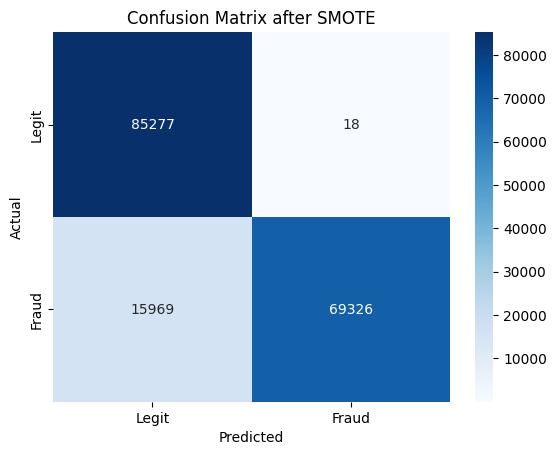

In [22]:
cm_balanced= confusion_matrix(y_test_resampled, y_pred_balanced)
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues',xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after SMOTE')
plt.show()

In [23]:
print(classification_report(y_test_resampled, y_pred_balanced))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     85295
           1       1.00      0.81      0.90     85295

    accuracy                           0.91    170590
   macro avg       0.92      0.91      0.91    170590
weighted avg       0.92      0.91      0.91    170590



In [24]:
y_proba_balanced = model.predict_proba(X_test_resampled)[:, 1]
fpr_balanced, tpr_balanced, thresholds = roc_curve(y_test_resampled, y_proba_balanced)

In [25]:
precision = precision_score(y_test_resampled, y_pred_balanced)
recall = recall_score(y_test_resampled, y_pred_balanced)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Precision: 0.9997
Recall: 0.8128


In [26]:
roc_auc_balanced = roc_auc_score(y_test_resampled, y_proba_balanced)
print(f'ROC AUC Score: {roc_auc_balanced:.4f}')

ROC AUC Score: 0.9656


In [27]:
accuracy_balanced=accuracy_score(y_test_resampled, y_pred_balanced)
print(f"Accuracy: {accuracy_balanced * 100:.2f}%")

Accuracy: 90.63%


In [28]:
print("Classification Report:")
print(classification_report(y_test_resampled, y_pred_balanced))

print("Confusion Matrix:")
print(confusion_matrix(y_test_resampled, y_pred_balanced))

print("ROC AUC Score:", roc_auc_score(y_test_resampled, y_proba_balanced))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     85295
           1       1.00      0.81      0.90     85295

    accuracy                           0.91    170590
   macro avg       0.92      0.91      0.91    170590
weighted avg       0.92      0.91      0.91    170590

Confusion Matrix:
[[85277    18]
 [15969 69326]]
ROC AUC Score: 0.9656384145092509


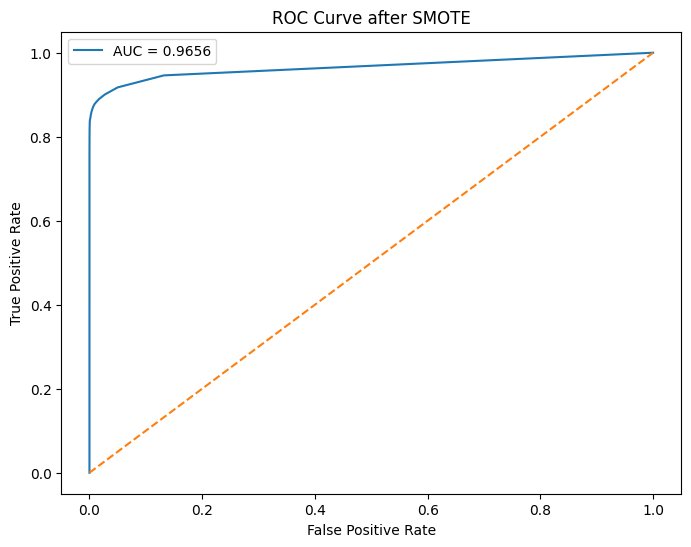

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_balanced, tpr_balanced, label=f"AUC = {roc_auc_score(y_test_resampled, y_proba_balanced):.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve after SMOTE')
plt.legend()
plt.show()


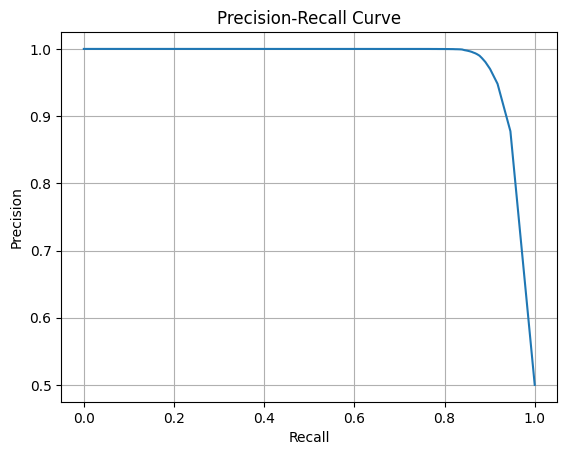

In [30]:
precision, recall, _ = precision_recall_curve(y_test_resampled, y_proba_balanced)
plt.figure()
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

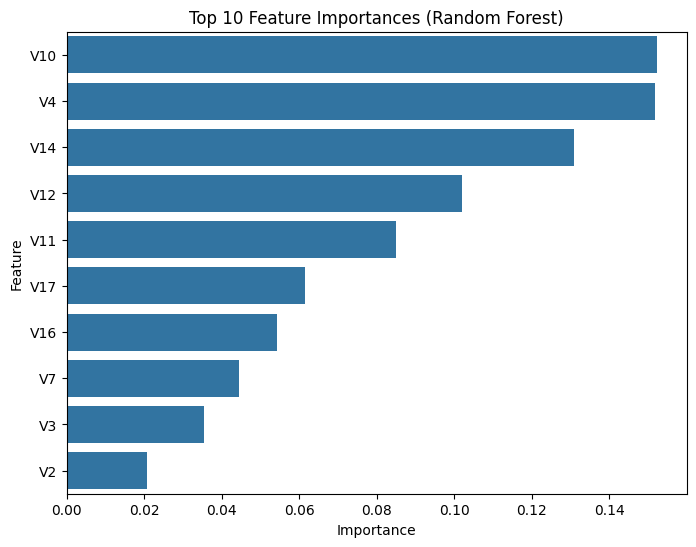

In [31]:
importances = pd.Series(model.feature_importances_, index=X_train_resampled.columns)
# Use X_train_resampled.columns as the index instead of X.columns
# X_train_resampled contains the features used to train the model, ensuring consistency.

top_features = importances.sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()



---



**Comparison of model before and after SMOTE**

In [32]:
model_imbalanced = RandomForestClassifier(class_weight='balanced', random_state=42)
model_imbalanced.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [50]:
y_proba_imbalanced = model_imbalanced.predict_proba(X_test)[:, 1]
y_pred_imbalanced = model_imbalanced.predict(X_test)

In [35]:
cm_balanced = confusion_matrix(y_test_resampled, y_pred_balanced)
cm_imbalanced = confusion_matrix(y_test, y_pred_imbalanced)

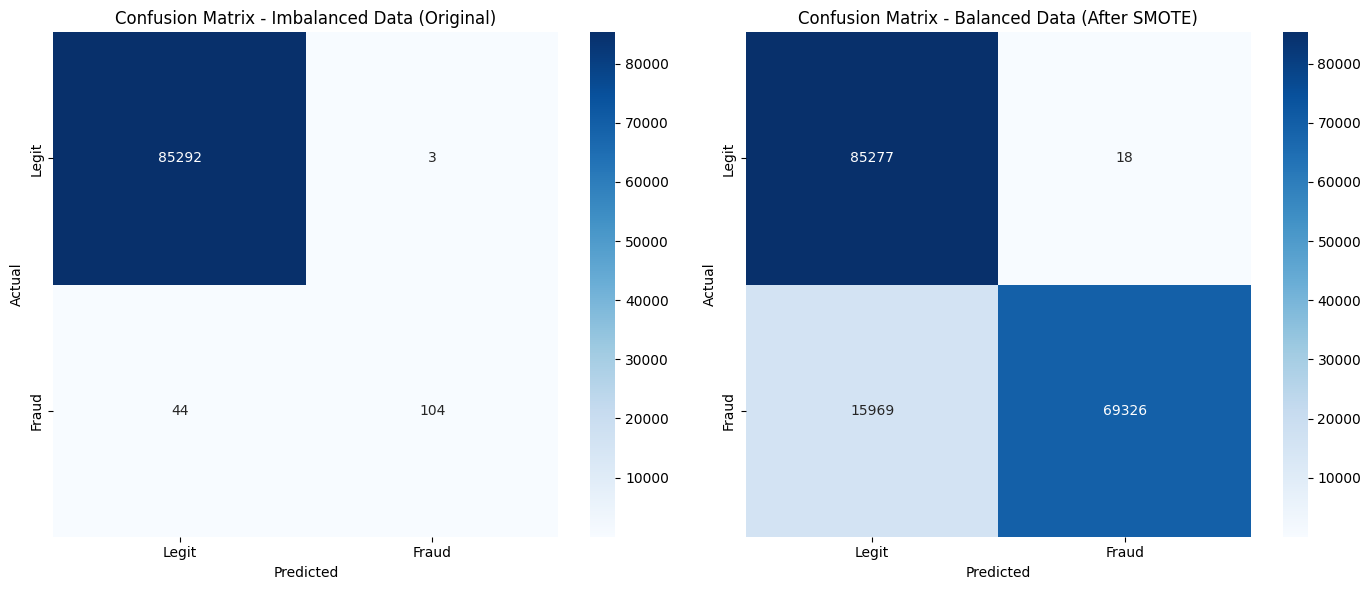

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm_imbalanced, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
axes[0].set_title('Confusion Matrix - Imbalanced Data (Original)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
axes[1].set_title('Confusion Matrix - Balanced Data (After SMOTE)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [42]:
fpr_imbalanced, tpr_imbalanced, _ = roc_curve(y_test, y_proba_imbalanced)
fpr_balanced, tpr_balanced, _ = roc_curve(y_test_resampled, y_proba_balanced)
auc_imbalanced = roc_auc_score(y_test, y_proba_imbalanced)
auc_balanced = roc_auc_score(y_test_resampled, y_proba_balanced)

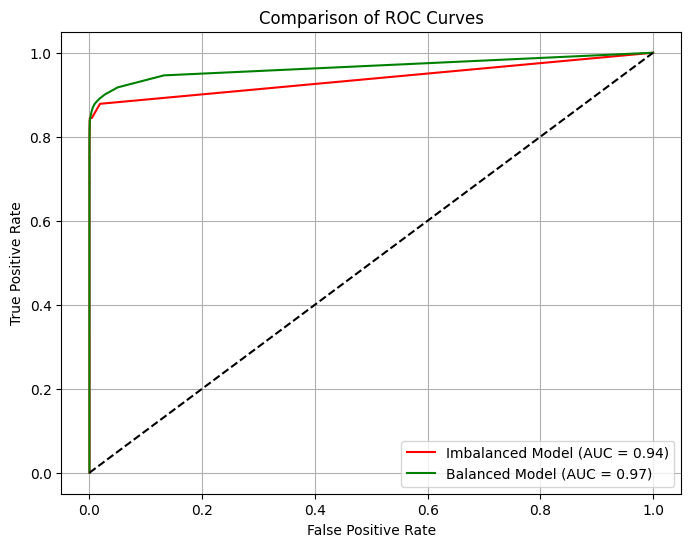

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_imbalanced, tpr_imbalanced, label=f"Imbalanced Model (AUC = {auc_imbalanced:.2f})", color='red')
plt.plot(fpr_balanced, tpr_balanced, label=f"Balanced Model (AUC = {auc_balanced:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves')
plt.legend()
plt.grid()
plt.show()

In [44]:
precision_imb, recall_imb, _ = precision_recall_curve(y_test, y_proba_imbalanced)
precision_bal, recall_bal, _ = precision_recall_curve(y_test_resampled, y_proba_balanced)

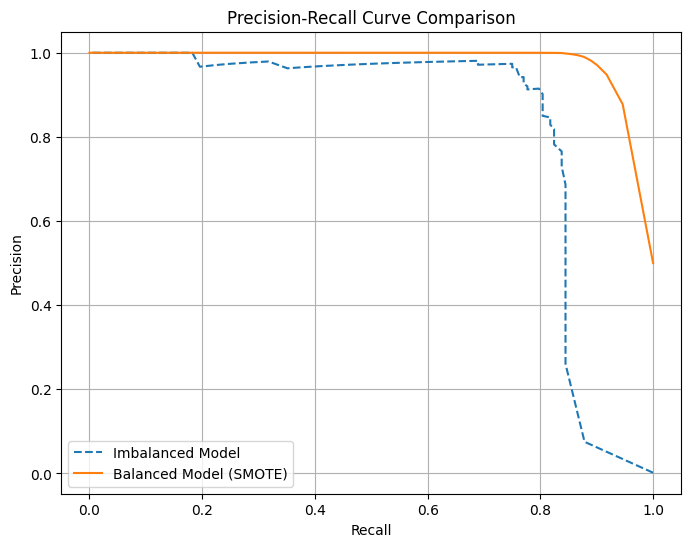

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(recall_imb, precision_imb, label='Imbalanced Model', linestyle='--')
plt.plot(recall_bal, precision_bal, label='Balanced Model (SMOTE)', linestyle='-')
plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

In [46]:
precision_imbalanced = precision_score(y_test, y_pred_imbalanced)
recall_imbalanced = recall_score(y_test, y_pred_imbalanced)

# 2. Precision and Recall for Balanced data
# (Use SMOTE-resampled data: X_train_resampled, y_train_resampled)
precision_balanced = precision_score(y_test_resampled, y_pred_balanced)
recall_balanced = recall_score(y_test_resampled, y_pred_balanced)

# 3. Print both comparisons
print(f"{'':<20}{'Precision':<15}{'Recall'}")
print(f"{'Imbalanced Data':<20}{precision_imbalanced:.4f}{' ' * 7}{recall_imbalanced:.4f}")
print(f"{'Balanced Data (SMOTE)':<20}{precision_balanced:.4f}{' ' * 7}{recall_balanced:.4f}")

                    Precision      Recall
Imbalanced Data     0.9720       0.7027
Balanced Data (SMOTE)0.9997       0.8128


In [47]:
roc_auc_balanced=roc_auc_score(y_test_resampled, y_proba_balanced)
print(f'ROC AUC Score balanced: {roc_auc_balanced:.4f}')
roc_auc_imbalanced = roc_auc_score(y_test, y_proba_imbalanced)
print(f'ROC AUC Score imbalanced: {roc_auc_imbalanced:.4f}')

ROC AUC Score balanced: 0.9656
ROC AUC Score imbalanced: 0.9376


In [49]:
accuracy_balanced= accuracy_score(y_test_resampled, y_pred_balanced)
print(f'Accuracy balanced: {accuracy_balanced * 100:.2f}%')
accuracy_imbalanced=accuracy_score(y_test, y_pred_imbalanced)
print(f"Accuracy imbalanced: {accuracy_imbalanced * 100:.2f}%")

Accuracy balanced: 90.63%
Accuracy imbalanced: 99.94%


class positive must be fraud

handle imbalance data

comparison of both balanced and imbalanced